# Simple Localization Using TensorFlow

## Installation (macOS m1)

* `conda create --name simple python=3.10`
* `conda config --set auto_activate_base false`
* `conda activate simple`
* `conda install -c apple tensorflow-deps`
* `conda install -c conda-forge -y pandas jupyter`
* `python3 -m pip install -r requirements.txt`

### Imports

In [68]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf

from utils.ui import plot_accuracy, plot_ljubljana

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Create a dataset from images directory.

In [69]:
batch_size = 32
img_width = 600
img_height = 600
num_of_classes = 64
data_dir = "./data/ljubljana/train"

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset="training",
    labels="inferred",
    label_mode="int",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset="validation",
    labels="inferred",
    label_mode="int",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=32,
)
train_ds.class_names


Found 13164 files belonging to 64 classes.
Using 10532 files for training.
Found 13164 files belonging to 64 classes.
Using 2632 files for validation.


['0-0',
 '0-1',
 '0-2',
 '0-3',
 '0-4',
 '0-5',
 '0-6',
 '0-7',
 '1-0',
 '1-1',
 '1-2',
 '1-3',
 '1-4',
 '1-5',
 '1-6',
 '1-7',
 '2-0',
 '2-1',
 '2-2',
 '2-3',
 '2-4',
 '2-5',
 '2-6',
 '2-7',
 '3-0',
 '3-1',
 '3-2',
 '3-3',
 '3-4',
 '3-5',
 '3-6',
 '3-7',
 '4-0',
 '4-1',
 '4-2',
 '4-3',
 '4-4',
 '4-5',
 '4-6',
 '4-7',
 '5-0',
 '5-1',
 '5-2',
 '5-3',
 '5-4',
 '5-5',
 '5-6',
 '5-7',
 '6-0',
 '6-1',
 '6-2',
 '6-3',
 '6-4',
 '6-5',
 '6-6',
 '6-7',
 '7-0',
 '7-1',
 '7-2',
 '7-3',
 '7-4',
 '7-5',
 '7-6',
 '7-7']

Setup buffered prefetching.

In [70]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Add data normalization layer, dropout layer and data augmentation layer.

In [71]:
normalization_layer = tf.keras.layers.Rescaling(
    1.0 / 255, input_shape=(img_width, img_height, 3)
)


In [72]:
model = tf.keras.Sequential(
    [
        normalization_layer,
        tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        # tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
        # tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(num_of_classes),
    ]
)


In [73]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


In [74]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/10


2022-11-24 17:13:47.464838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


330/330 [==============================] - ETA: 0s - loss: 6.0239 - accuracy: 0.0228

2022-11-24 17:17:54.079664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


330/330 [==============================] - 287s 865ms/step - loss: 6.0239 - accuracy: 0.0228 - val_loss: 4.0570 - val_accuracy: 0.0380
Epoch 2/10
330/330 [==============================] - 284s 861ms/step - loss: 3.9738 - accuracy: 0.0434 - val_loss: 3.9214 - val_accuracy: 0.0456
Epoch 3/10
330/330 [==============================] - 284s 862ms/step - loss: 3.5916 - accuracy: 0.1150 - val_loss: 3.8354 - val_accuracy: 0.0847
Epoch 4/10
330/330 [==============================] - 285s 863ms/step - loss: 2.5970 - accuracy: 0.3288 - val_loss: 4.4420 - val_accuracy: 0.0748
Epoch 5/10
330/330 [==============================] - 281s 853ms/step - loss: 1.2422 - accuracy: 0.6717 - val_loss: 5.8182 - val_accuracy: 0.0885
Epoch 6/10
330/330 [==============================] - 282s 854ms/step - loss: 0.4170 - accuracy: 0.9012 - val_loss: 8.0159 - val_accuracy: 0.0862
Epoch 7/10
330/330 [==============================] - 284s 859ms/step - loss: 0.1887 - accuracy: 0.9655 - val_loss: 8.5229 - val_accura

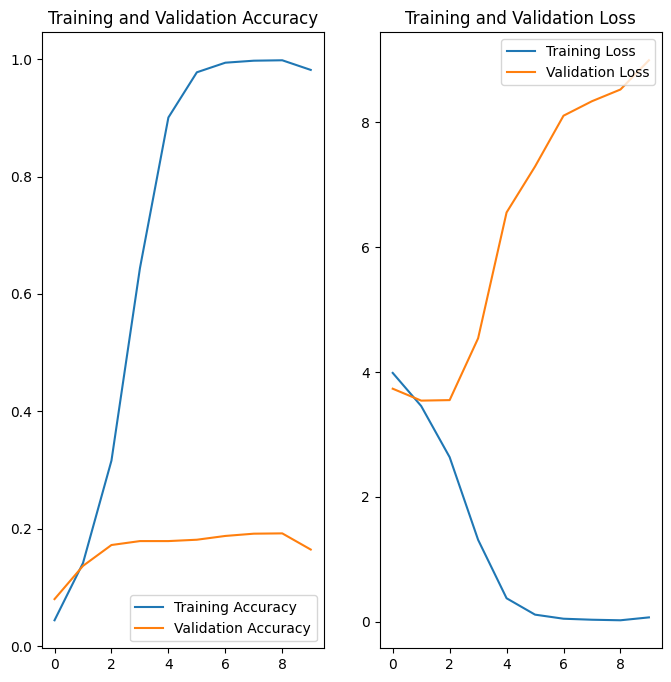

In [21]:
plot_accuracy(history, epochs)


1/1 [==============================] - 0s 106ms/step


2022-11-24 10:36:41.504725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


This image most likely belongs to octant 5-2 with a 93.76 percent confidence.


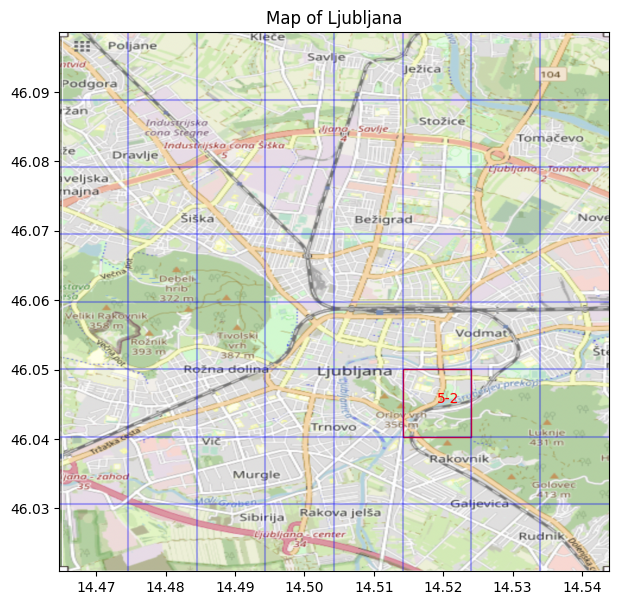

In [11]:
class_names = train_ds.class_names

def predict(img_name):
    img = tf.keras.utils.load_img(f"./data/ljubljana/{img_name}.png", target_size=(img_width, img_height))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to octant {} with a {:.2f} percent confidence.".format(
            class_names[np.argmax(score)], 100 * np.max(score)
        )
    )

    plot_ljubljana([class_names[np.argmax(score)]], 8)

predict("test4")
